In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df =pd.read_csv('GroundTruth.csv', sep=',', delimiter=None)
x = df['bbox_x']
y = df['bbox_y']

In [5]:
df1 = pd.read_csv('img640\TestVid2_botsort.csv')
x1 = df1['xmin']
y1 = df1['ymin']

BOTSORT Tracking

In [14]:
count = 0
for i in range(len(x)):
    predicted_coordinates = list(zip(x1,y1))
    ground_coordinates = list(zip(x,y))
    count += 1
    

In [7]:
def avg_displacement_error(predicted, ground_truth):
  error = 0
  for i in range(len(predicted)):
    error += ((predicted[i][0] - ground_truth[i][0]) ** 2 + (predicted[i][1] - ground_truth[i][1]) ** 2) ** 0.5
  return error / len(predicted)

In [8]:
#Average Mahalanobis Distance (AMD)
from scipy.spatial.distance import mahalanobis
def avg_mahalanobis_distance(predicted, ground_truth):
    
    predicted = np.array(predicted)
    ground_truth = np.array(ground_truth)
    mean_predicted = np.mean(predicted, axis=0)
    mean_ground_truth = np.mean(ground_truth, axis=0)
    cov_predicted = np.cov(predicted.T)
    cov_ground_truth = np.cov(ground_truth.T)
    inv_cov_predicted = np.linalg.inv(cov_predicted)
    inv_cov_ground_truth = np.linalg.inv(cov_ground_truth)
    error = 0
    for i in range(len(predicted)):
        error += mahalanobis(predicted[i], ground_truth[i], inv_cov_predicted + inv_cov_ground_truth)
    return error / len(predicted)


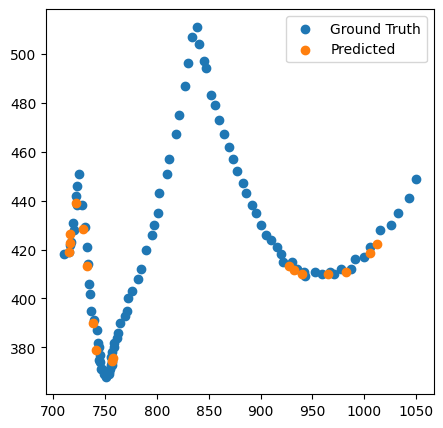

In [10]:
#plot the ground truth and predicted coordinates
plt.figure(figsize=(5,5))
plt.scatter(x,y, label='Ground Truth')
plt.scatter(x1,y1, label='Predicted')
plt.legend()
plt.show()

In [15]:
error1 = avg_displacement_error(predicted_coordinates, ground_coordinates)
error2 = avg_mahalanobis_distance(predicted_coordinates, ground_coordinates)
print("ADE of botsort is: ", error1)
print("AMD of botsort is: ", error2)

ADE of botsort is:  116.33665288427967
AMD of botsort is:  2.5027180004476457


yolov8 BYTETrack tracking

In [13]:
df2 = pd.read_csv('img640\TestVid2_bytetrack.csv')
x2 = df2['xmin']
y2 = df2['ymin']

In [17]:
count = 0
for i in range(len(x)):
    predicted_coordinates2 = list(zip(x2,y2))
    ground_coordinates = list(zip(x,y))
    count += 1

In [18]:
error3 = avg_displacement_error(predicted_coordinates2, ground_coordinates)
error4 = avg_mahalanobis_distance(predicted_coordinates2, ground_coordinates)
print("ADE of bytetrack is: ", error3)
print("AMD of bytetrack is: ", error4)

ADE of bytetrack is:  119.95124906817345
AMD of bytetrack is:  2.7663014156814962


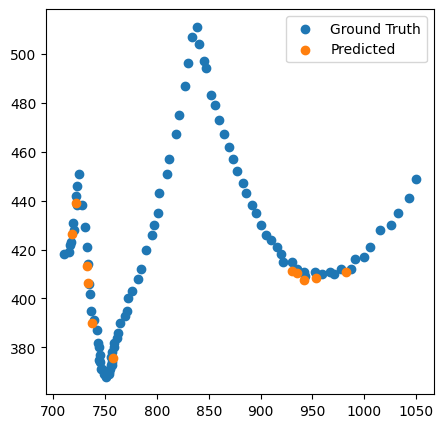

In [19]:
#plot the ground truth and predicted coordinates2
import matplotlib.pyplot as plt
from matplotlib import markers
plt.figure(figsize=(5,5))
plt.scatter(x,y, label='Ground Truth')
plt.scatter(x2,y2, label='Predicted')
plt.legend()
plt.show()

yolov8 DeepOCSORT

In [20]:
df3 = pd.read_csv('img640\TestVid2_deepocsort.csv')
x3 = df3['xmin']
y3 = df3['ymin']

count = 0
for i in range(len(x)):
    predicted_coordinates3 = list(zip(x3,y3))
    ground_coordinates = list(zip(x,y))
    count += 1

In [21]:
error5 = avg_displacement_error(predicted_coordinates3, ground_coordinates)
error6 = avg_mahalanobis_distance(predicted_coordinates3, ground_coordinates)
print("ADE of deepocsort is: ", error5)
print("AMD of deepocsort is: ", error6)

ADE of deepocsort is:  119.65173825202335
AMD of deepocsort is:  2.445696713210104


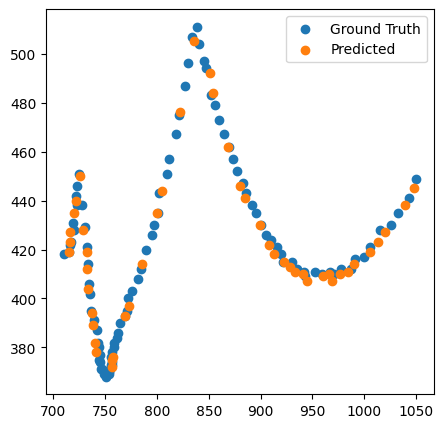

In [22]:
#plot the ground truth and predicted coordinates3
import matplotlib.pyplot as plt
from matplotlib import markers
plt.figure(figsize=(5,5))
plt.scatter(x,y, label='Ground Truth')
plt.scatter(x3,y3, label='Predicted')
plt.legend()
plt.show()

yolov8 ocsort tracking

In [23]:
df4 = pd.read_csv('img640\TestVid2_ocsort.csv')
x4 = df4['xmin']
y4 = df4['ymin']

count = 0
for i in range(len(x)):
    predicted_coordinates4 = list(zip(x4,y4))
    ground_coordinates = list(zip(x,y))
    count += 1

In [24]:
error7 = avg_displacement_error(predicted_coordinates4, ground_coordinates)
error8 = avg_mahalanobis_distance(predicted_coordinates4, ground_coordinates)
print("ADE of ocsort is: ", error7)
print("AMD of ocsort is: ", error8)

ADE of ocsort is:  119.01159695492365
AMD of ocsort is:  2.5176870549676784


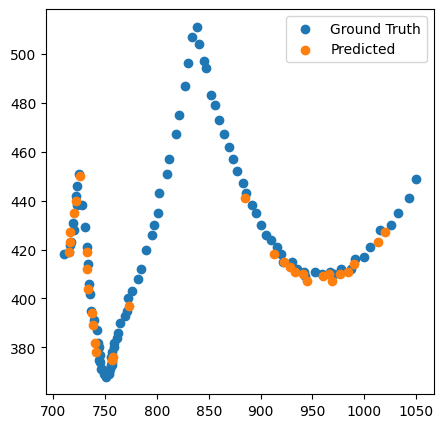

In [25]:
#plot the ground truth and predicted coordinates4
plt.figure(figsize=(5,5))
plt.scatter(x,y, label='Ground Truth')
plt.scatter(x4,y4, label='Predicted')
plt.legend()
plt.show()

Yolov8 StrongSORT

In [26]:
df5 = pd.read_csv('img640\TestVid2_strongsort.csv')
x5 = df5['xmin']
y5 = df5['ymin']

count = 0
for i in range(len(x)):
    predicted_coordinates5 = list(zip(x5,y5))
    ground_coordinates = list(zip(x,y))
    count += 1

In [27]:
error9 = avg_displacement_error(predicted_coordinates5, ground_coordinates)
error10 = avg_mahalanobis_distance(predicted_coordinates5, ground_coordinates)
print("ADE of strongsort is: ", error9)
print("AMD of strongsort is: ", error10)

ADE of strongsort is:  132.47134234378066
AMD of strongsort is:  2.663745415591934


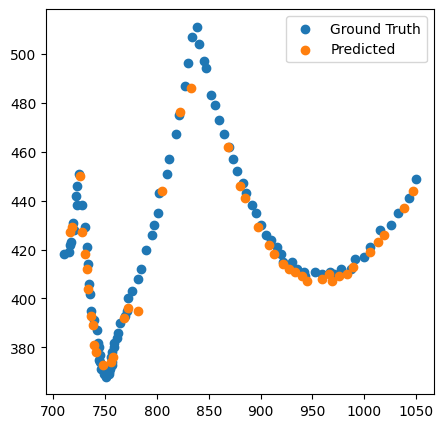

In [28]:
#plot the ground truth and predicted coordinates5
plt.figure(figsize=(5,5))
plt.scatter(x,y, label='Ground Truth')
plt.scatter(x5,y5, label='Predicted')
plt.legend()
plt.show()